In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [14]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)


In [16]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
dir(Measurement)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_decl_class_registry',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 'classes',
 'date',
 'id',
 'metadata',
 'prcp',
 'prepare',
 'station',
 'tobs']

In [19]:
inspector = inspect(engine)
measurement_c = inspector.get_columns('Measurement')
for c in measurement_c:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [20]:
inspector = inspect(engine)
station_c = inspector.get_columns('Station')
for c in station_c:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database


last_data_point = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
print(f"The date for the last data point is: {last_data_point}")

a_year_ago = dt.datetime(2016, 8, 23)
last_data_point = dt.datetime(2017, 8, 23)

print(f"The date 1 year ago from the last data point is: {a_year_ago}")


The date for the last data point is: ('2017-08-23',)
The date 1 year ago from the last data point is: 2016-08-23 00:00:00


In [26]:
# Perform a query to retrieve the data and precipitation scores


prcp = session.query(func.avg(Measurement.prcp), Measurement.date).\
    filter(Measurement.date > a_year_ago).\
    group_by(Measurement.date).all()
prcp

[(1.5549999999999997, '2016-08-24'),
 (0.07714285714285715, '2016-08-25'),
 (0.016666666666666666, '2016-08-26'),
 (0.06399999999999999, '2016-08-27'),
 (0.5166666666666666, '2016-08-28'),
 (0.24333333333333332, '2016-08-29'),
 (0.011666666666666667, '2016-08-30'),
 (0.6359999999999999, '2016-08-31'),
 (0.006, '2016-09-01'),
 (0.05, '2016-09-02'),
 (0.254, '2016-09-03'),
 (0.276, '2016-09-04'),
 (0.08499999999999999, '2016-09-05'),
 (0.246, '2016-09-06'),
 (0.3333333333333333, '2016-09-07'),
 (0.07666666666666667, '2016-09-08'),
 (0.17833333333333332, '2016-09-09'),
 (0.27999999999999997, '2016-09-10'),
 (0.25, '2016-09-11'),
 (0.308, '2016-09-12'),
 (0.45166666666666666, '2016-09-13'),
 (2.3800000000000003, '2016-09-14'),
 (0.8266666666666667, '2016-09-15'),
 (0.11714285714285715, '2016-09-16'),
 (0.13599999999999998, '2016-09-17'),
 (0.10600000000000001, '2016-09-18'),
 (0.064, '2016-09-19'),
 (0.14714285714285716, '2016-09-20'),
 (0.19499999999999998, '2016-09-21'),
 (0.205714285714

In [27]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_list = []

for number, date in prcp:
    prcp_list.append({f"{date}": number})
    
prcp_list

[{'2016-08-24': 1.5549999999999997},
 {'2016-08-25': 0.07714285714285715},
 {'2016-08-26': 0.016666666666666666},
 {'2016-08-27': 0.06399999999999999},
 {'2016-08-28': 0.5166666666666666},
 {'2016-08-29': 0.24333333333333332},
 {'2016-08-30': 0.011666666666666667},
 {'2016-08-31': 0.6359999999999999},
 {'2016-09-01': 0.006},
 {'2016-09-02': 0.05},
 {'2016-09-03': 0.254},
 {'2016-09-04': 0.276},
 {'2016-09-05': 0.08499999999999999},
 {'2016-09-06': 0.246},
 {'2016-09-07': 0.3333333333333333},
 {'2016-09-08': 0.07666666666666667},
 {'2016-09-09': 0.17833333333333332},
 {'2016-09-10': 0.27999999999999997},
 {'2016-09-11': 0.25},
 {'2016-09-12': 0.308},
 {'2016-09-13': 0.45166666666666666},
 {'2016-09-14': 2.3800000000000003},
 {'2016-09-15': 0.8266666666666667},
 {'2016-09-16': 0.11714285714285715},
 {'2016-09-17': 0.13599999999999998},
 {'2016-09-18': 0.10600000000000001},
 {'2016-09-19': 0.064},
 {'2016-09-20': 0.14714285714285716},
 {'2016-09-21': 0.19499999999999998},
 {'2016-09-22': 

In [28]:
# Sort the dataframe by date


prcp_df = pd.DataFrame(prcp, columns =['Prcp', 'Date']).set_index("Date")
prcp_df.head()

,Prcp
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


<AxesSubplot:xlabel='Date'>

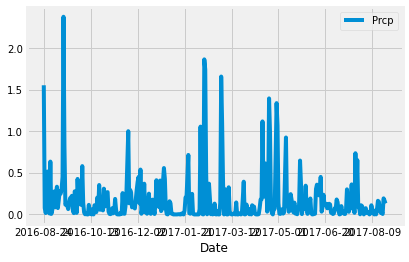

In [29]:
# Use Pandas Plotting with Matplotlib to plot the data


prcp_df.plot()

In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df.describe()

,Prcp
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [31]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()

9

In [33]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = session.query(Station.station, func.count(Measurement.station)).\
    filter(Station.station == Measurement.station).\
    group_by(Station.station).\
    order_by(func.count(Measurement.station).desc()).all()

print(f"Most active stations:")
active_stations_df = pd.DataFrame(active_stations, columns=['Station Name', "Observation Count"])
active_stations_df

Most active stations:


,Station Name,Observation Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [35]:
#Design a query to retrieve the last 12 months of temperature observation data (TOBS) for the most active station.
tobs = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > a_year_ago).all()
tobs

[(77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 

In [36]:
tob_list = []

for tob in tobs:
    tob_list.append(tob[0])

#tob_list = [tob[0] for tob in tobs]
    
tob_list

[77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,
 69.0,

(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 52., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <BarContainer object of 12 artists>)

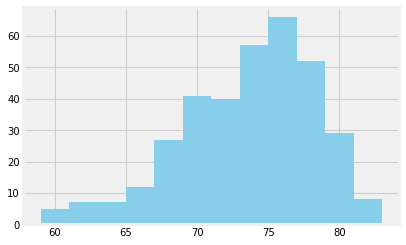

In [38]:
plt.hist(tob_list, bins=12, color = "skyblue")

In [43]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

station_min_tobs = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
station_max_tobs = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
station_avg_tobs = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(f"The lowest temperature recorded is: {station_min_tobs}")
print(f"The highest temperature recorded is: {station_max_tobs}")
print(f"The average temperature recorded is: {station_avg_tobs}")

The lowest temperature recorded is: [(54.0,)]
The highest temperature recorded is: [(85.0,)]
The average temperature recorded is: [(71.66378066378067,)]


In [44]:
#When given the start date only, calculate min, max, and avg for all dates greater than and equal to the start date.

#date = start

date = "2016-08-10"

min_tobs = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.date <= date).all()
avg_tobs = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.date <= date).all()
max_tobs = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.date <= date).all()

print(min_tobs)
print(avg_tobs)
print(max_tobs)

[(53.0,)]
[(72.88308299019891,)]
[(87.0,)]


In [45]:
#When given the start and the end date, calculate the min, avg, and max for dates between the start and end date inclusive.

date_start = "2016-08-20"
date_end = "2016-09-20"

min_tobs = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.date <= date_end).\
    filter(Measurement.date >= date_start).all()
avg_tobs = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.date <= date_end).\
    filter(Measurement.date >= date_start).all()
max_tobs = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.date <= date_end).\
    filter(Measurement.date >= date_start).all()

print(min_tobs)
print(avg_tobs)
print(max_tobs)

[(70.0,)]
[(77.74626865671642,)]
[(84.0,)]


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
